# Hello ShAI Community

I am Ahmed Maher and I will be appreciated to be one of ShAI community.

I hope that my task will be perfect.

**I will start by importing the libraries and reading the data then answer the questions.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer


In [59]:
# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [60]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

##1- Basic Data Exploration

In [61]:
# Identify the number of rows and columns in the dataset

df.shape

(148654, 13)

In [62]:
# Determine the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [63]:
# Check for missing values in each column.

df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

##2- Descriptive Statistics

In [64]:
# Calculate basic statistics mean, median, mode, minimum, and maximum salary

mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]  # mode() returns a Series, so we take the first value
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

# Print the results
print(f"Mean: {mean_salary}")
print(f"Median: {median_salary}")
print(f"Mode: {mode_salary}")
print(f"Minimum: {min_salary}")
print(f"Maximum: {max_salary}")

Mean: 74768.32197169267
Median: 71426.60999999999
Mode: 0.0
Minimum: -618.13
Maximum: 567595.43


I see there are zero and negative salaries, let us see how many of them

In [65]:
# The employees with zero salary

zero_salary_employees = df[df['TotalPay'] == 0]
zero_salary_employees.shape

(368, 13)

In [69]:
# The employees with negative salary

negative_salary_employees = df[df['TotalPay'] < 0]
negative_salary_employees.shape

(1, 13)

**There is no salary equal to or less than zero so I removed them**

In [39]:
# Define a condition to remove rows (e.g., remove rows where 'Salary' is less than 70000)
condition = df['TotalPay'] <= 0

# Remove rows based on the condition
df = df[~condition]

# Display the resulting DataFrame
print("DataFrame after removing rows:")
df.shape

DataFrame after removing rows:


(148285, 13)

**The Range of salaries**

Salary Range: 567595.13


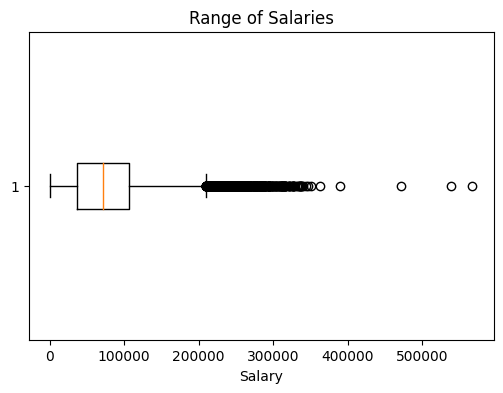

In [40]:
# Determine the range of salaries
salary_range = df['TotalPay'].max() - df['TotalPay'].min()

print(f"Salary Range: {salary_range}")


# Plot the range of salaries
plt.figure(figsize=(6, 4))
# Boxplot for visualizing the range
plt.boxplot(df['TotalPay'], vert=False)

plt.title('Range of Salaries')
plt.xlabel('Salary')
plt.show()




In [41]:
# Find the standard deviation of salaries
salary_std_dev = df['TotalPay'].std()

# Print or use the results
print(f"Salary Standard Deviation: {salary_std_dev}")

Salary Standard Deviation: 50441.7662188465


**To see the statitics of the numerical features of the data:**

In [42]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148285.000000,147968.000000,148285.000000,148285.000000,112129.000000,148285.000000,148285.000000,148285.000000,0.0,0.0
mean,74239.440483,66359.963462,5078.529872,3657.752819,25066.751051,74954.383468,93909.164657,2012.521307,NaN,NaN
std,42919.609576,42748.980506,11465.707967,8064.472792,15391.472880,50441.766219,62720.972790,1.118338,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-13.800000,0.300000,0.300000,2011.000000,NaN,NaN
25%,37075.000000,33699.580000,0.000000,0.000000,11915.280000,36679.200000,44692.040000,2012.000000,NaN,NaN
50%,74171.000000,65030.645000,0.000000,819.540000,28670.970000,71553.000000,92572.300000,2013.000000,NaN,NaN
75%,111530.000000,94694.502500,4680.210000,4254.900000,35590.730000,105967.060000,133004.190000,2014.000000,NaN,NaN
max,148626.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


#3- Data Cleaning

The 2 columns (Notes, Status) are all nulls so I will drop them

In [43]:
# Drop Notes, and Status columns

df.drop(['Notes', 'Status'], axis=1, inplace=True)


In [44]:
# Check the nulls again

df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               317
OvertimePay             0
OtherPay                0
Benefits            36156
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

We have other 2 columns with nulls (Benefits, BasePay).

The Benefits column represents about a quarter of the data and they are nulls, so I will see if this column is correlated with other columns or not.

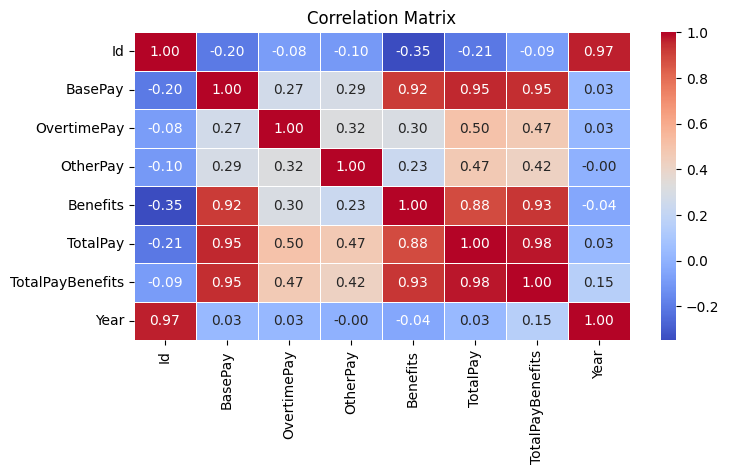

In [45]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

I can see that the "Benefits" column is very correlated with the others, so if I filled the nulls with mean or median I can't guarantee that it will be correct because it affects the others.

The best thing is using advenced imputation technique like KNNImputer.

**KNNImputer:** Preserve the relationships between the features.


In [46]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [47]:
df2= df.drop(['EmployeeName', 'JobTitle','Agency'], axis=1)
df2.head()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,4,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,5,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


**Handling Missing Values in  (Benefits, BasePay).**

In [49]:
# Copy the data
df_knn_imputed = df2.copy(deep=True)

# Init the transformer
knn_imp = KNNImputer(n_neighbors=5)

# Fit/transform
df_knn_imputed.loc[:, :] = knn_imp.fit_transform(df_knn_imputed)

df_knn_imputed.isnull().sum()

Id                  0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

The Final dataframe after removing missing values

In [50]:
df_final = df_knn_imputed.copy(deep=True)

# Add the removed columns back to the new DataFrame
columns_to_remove = ['EmployeeName', 'JobTitle','Agency']
for column in columns_to_remove:
    df_final[column] = df[column]

# Display the final DataFrame with the removed columns added back
print("\nFinal DataFrame with removed columns added back:")
df_final.head()


Final DataFrame with removed columns added back:


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,EmployeeName,JobTitle,Agency
0,1.0,167411.18,0.00,400184.25,38332.710,567595.43,567595.43,2011.0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco
1,2.0,155966.02,245131.88,137811.38,51782.502,538909.28,538909.28,2011.0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco
2,3.0,212739.13,106088.18,16452.60,53811.714,335279.91,335279.91,2011.0,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco
3,4.0,77916.00,56120.71,198306.90,33180.638,332343.61,332343.61,2011.0,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco
4,5.0,134401.60,9737.00,182234.59,33180.638,326373.19,326373.19,2011.0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco


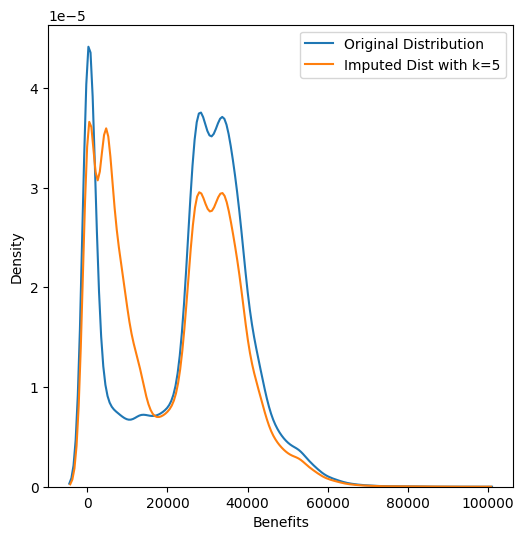

In [53]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.kdeplot(df.Benefits, label="Original Distribution")
sns.kdeplot(df_final.Benefits, label=f"Imputed Dist with k=5")
plt.legend()

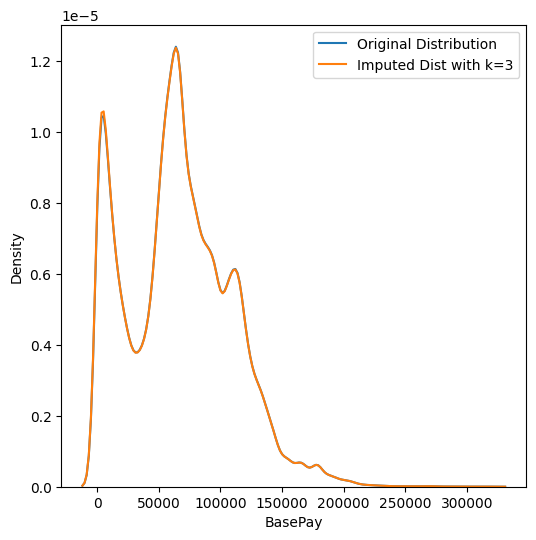

In [54]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.kdeplot(df.BasePay, label="Original Distribution")
sns.kdeplot(df_final.BasePay, label=f"Imputed Dist with k=3")
plt.legend()

#4- Basic Data Visualization

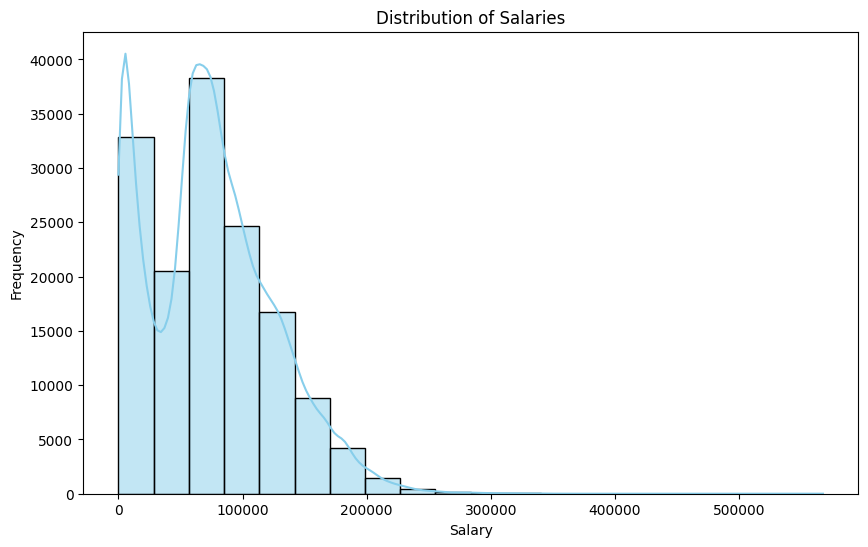

In [55]:
# Visualize the distribution of salaries using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_final['TotalPay'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


**After checking the "JobTitle" feature I discovered that the department is between parentheses (), so I will extract the departments**

In [70]:
df_final['Department'] = df_final['JobTitle'].str.extract(r'\((.*?)\)')
df_final.head()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,EmployeeName,JobTitle,Agency,Department
0,1.0,167411.18,0.00,400184.25,38332.710,567595.43,567595.43,2011.0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,NaN
1,2.0,155966.02,245131.88,137811.38,51782.502,538909.28,538909.28,2011.0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,POLICE DEPARTMENT
2,3.0,212739.13,106088.18,16452.60,53811.714,335279.91,335279.91,2011.0,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,POLICE DEPARTMENT
3,4.0,77916.00,56120.71,198306.90,33180.638,332343.61,332343.61,2011.0,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco,NaN
4,5.0,134401.60,9737.00,182234.59,33180.638,326373.19,326373.19,2011.0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco,FIRE DEPARTMENT


In [71]:
df_final.isnull().sum()

Id                       0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
EmployeeName             0
JobTitle                 0
Agency                   0
Department          145692
dtype: int64

**The most employees are not in departments**

In [72]:
df_final['Department'].unique()

array([nan, 'POLICE DEPARTMENT', 'FIRE DEPARTMENT', 'CIVIL & CRIMINAL',
       'CIVIL/CRIMINAL', 'MFCC', 'SEASONAL', 'Fire Dept', 'Cvl&Crmnl',
       'Civil & Criminal', 'SFERS', 'Police Department', 'Civil/Criminal',
       'Seasonal', 'Fire Department'], dtype=object)

**There are department names need to be merged**

In [73]:
# Define a mapping dictionary for merging similar categories
merge_mapping = {
    'POLICE DEPARTMENT': 'Police Department',
    'Police Department': 'Police Department',

    'FIRE DEPARTMENT': 'Fire Department',
    'Fire Department': 'Fire Department',
    'Fire Dept': 'Fire Department',

    'CIVIL & CRIMINAL': 'Civil & Criminal',
    'CIVIL/CRIMINAL': 'Civil & Criminal',
    'Cvl&Crmnl': 'Civil & Criminal',
    'Civil/Criminal': 'Civil & Criminal',

    'SEASONAL': 'Seasonal',
    'Seasonal': 'Seasonal',
}

# Replace values based on the mapping dictionary
df_final['Department'] = df_final['Department'].replace(merge_mapping)

# Display the DataFrame with the merged column
df_final.head()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,EmployeeName,JobTitle,Agency,Department
0,1.0,167411.18,0.00,400184.25,38332.710,567595.43,567595.43,2011.0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,NaN
1,2.0,155966.02,245131.88,137811.38,51782.502,538909.28,538909.28,2011.0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,Police Department
2,3.0,212739.13,106088.18,16452.60,53811.714,335279.91,335279.91,2011.0,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,Police Department
3,4.0,77916.00,56120.71,198306.90,33180.638,332343.61,332343.61,2011.0,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco,NaN
4,5.0,134401.60,9737.00,182234.59,33180.638,326373.19,326373.19,2011.0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco,Fire Department


In [74]:
df_final['Department'].unique()

array([nan, 'Police Department', 'Fire Department', 'Civil & Criminal',
       'MFCC', 'Seasonal', 'SFERS'], dtype=object)

In [75]:
# Replace NaN values in column 'Department' with the word "other"

df_final['Department'] = df_final['Department'].fillna('other')

In [76]:
department_counts = df_final['Department'].value_counts()
department_counts

other                145692
Civil & Criminal       1533
Police Department       712
Seasonal                116
MFCC                     90
Fire Department          78
SFERS                    64
Name: Department, dtype: int64

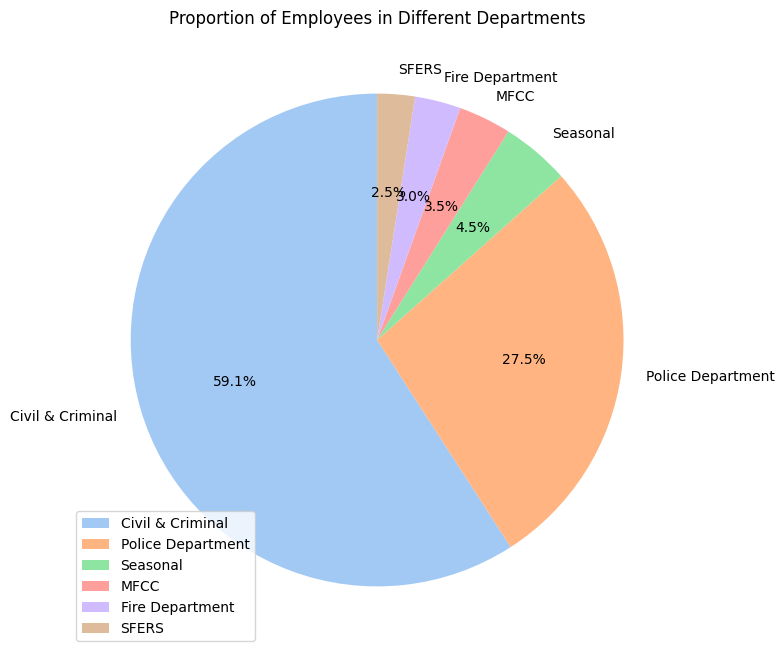

In [83]:
# Visualize the proportion of employees in different departments using a pie chart
department_counts = df_final['Department'].value_counts()[1:] # Removing other

plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Proportion of Employees in Different Departments')
plt.legend()
plt.show()

#5- Grouped Analysis

In [78]:
Agency_counts = df_final['Agency'].value_counts()
Agency_counts

San Francisco    148285
Name: Agency, dtype: int64

In [79]:
year_counts = df_final['Year'].value_counts()
year_counts

2014.0    38070
2013.0    37318
2012.0    36741
2011.0    36156
Name: Year, dtype: int64

**I can Group by Year and Department columns**

In [80]:
grouped_data = df_final.groupby(['Year','Department']).agg({
    'TotalPay': ['mean', 'median', 'min', 'max', 'std'],
}).reset_index()

# Display the grouped data
print("Grouped Data with Average Salaries:")
grouped_data

Grouped Data with Average Salaries:


Year         Department       TotalPay                         \
                                        mean      median        min   
0   2011.0   Civil & Criminal  129165.480000  140691.970     602.20   
1   2011.0    Fire Department  221158.444615  226838.115    7093.37   
2   2011.0               MFCC   67517.330222   79729.945    1122.70   
3   2011.0  Police Department  158810.073568  152379.470     283.86   
4   2011.0           Seasonal    7488.975667    7045.965    1380.00   
5   2011.0              other   69298.595984   67101.905       0.30   
6   2012.0   Civil & Criminal  134923.415119  150831.480     541.83   
7   2012.0    Fire Department  255201.191111  268486.400  107699.79   
8   2012.0  Police Department  146796.504444  145918.115     438.22   
9   2012.0              SFERS   78510.276667   77149.250    3346.00   
10  2012.0           Seasonal    8919.360000    8149.200     293.40   
11  2012.0              other   73502.787162   70339.480       1.77   
12  2013.0   Civil & Criminal  144657.563475  160189.010     378.90   
13  2013.0    Fire Department  265593.600000  290992.510   35332.78   
14  2013.0  Police Department  154656.967500  166475.865    7857.26   
15  2013.0              SFERS   86609.832000   92011.820     576.36   
16  2013.0           Seasonal   10946.450000    9156.800    4500.80   
17  2013.0              other   77503.393846   74500.480       5.56   
18  2014.0   Civil & Criminal  138909.879518  156347.900      13.35   
19  2014.0    Fire Department  281220.665000  285575.785  235275.60   
20  2014.0  Police Department  159498.771818  153270.620  120050.22   
21  2014.0              SFERS   90172.248500   87118.095   11116.41   
22  2014.0           Seasonal   10246.758519    9404.120    4157.40   
23  2014.0              other   74868.137074   72052.615       1.83   

                             
          max           std  
0   214988.68  43335.943219  
1   326373.19  55969.573003  
2    97413.08  23341.204323  
3   538909.28  31092.000146  
4    17479.80   3272.941172  
5   567595.43  45453.190785  
6   221910.50  44348.777652  
7   315728.77  59675.155455  
8   213297.43  43845.790738  
9   206651.69  59582.111284  
10   17657.80   3578.244758  
11  362844.66  49036.788704  
12  225366.50  48311.051388  
13  333888.32  89973.080839  
14  192433.32  43200.950542  
15  231739.64  62233.259273  
16   20952.00   4237.267264  
17  347102.32  52092.592287  
18  221676.97  51566.749075  
19  329390.54  28299.189119  
20  190270.76  21197.082813  
21  228566.89  40442.417044  
22   19568.70   3689.333398  
23  471952.64  51145.201503

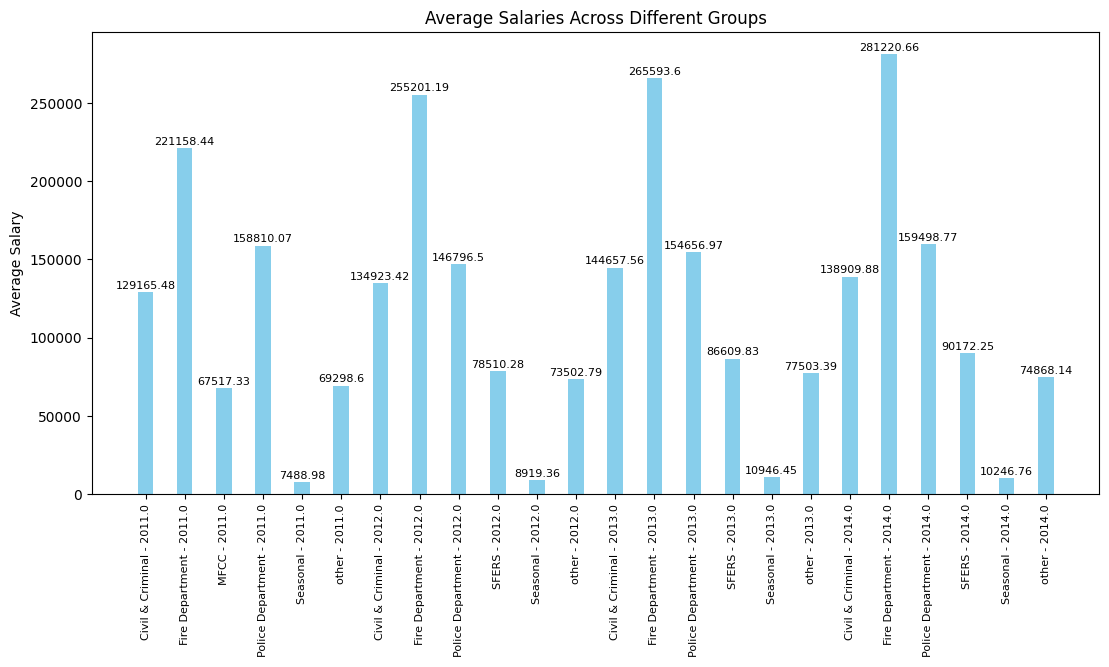

In [81]:
# Plot the average salaries across different groups
plt.figure(figsize=(13, 6))
bar_plot = plt.bar(range(len(grouped_data)), grouped_data['TotalPay']['mean'], color='skyblue', width=0.4)

# Customize the plot
plt.xticks(range(len(grouped_data)), [f"{dept} - {pos}" for dept, pos in zip(grouped_data['Department'], grouped_data['Year'])], rotation=90, fontsize=8)
plt.ylabel('Average Salary')
plt.title('Average Salaries Across Different Groups')

# Add data labels on top of each bar
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()

#6- Simple Correlation Analysis

**Show the relationship between 'Salary' and 'Benefits'**

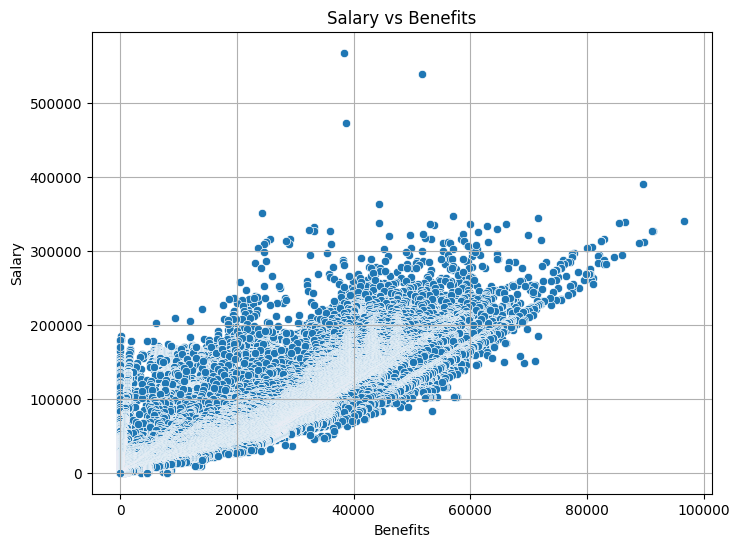

In [82]:
# Scatter plot to visualize the relationship between 'Salary' and 'Benefits'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Benefits', y='TotalPay', data=df_final, palette='viridis')

# Customize the plot
plt.title('Salary vs Benefits')
plt.xlabel('Benefits')
plt.ylabel('Salary')
plt.grid(True)

plt.show()

#7- Summary of Insights

1. I removed the salaries that are equal to or less than zero.
2. The features 'Benefits', 'TotalPay', 'TotalPayBenefits' are possitivly and strongly related.
3. There is one Agency "San Francisco".
4. The most employees are not in departments
5. Civil & Criminal Department has the most employees then the police department.
6. The Fire Department has more salaries than any department every year.
